# Dimensionality reduction using PCA (Principal component analysis) y t-SNE (t-Distributed Stochastic Neighbor Embedding)

## Álvaro Andrés Esquivel Gómez 11002822

In [25]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [26]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


### Carga de datos, dataset mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

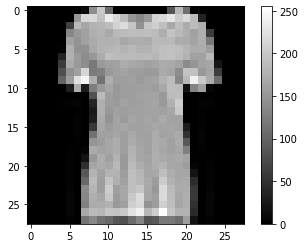

In [4]:
#Imagen de muestra
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

In [5]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


## Reduccion a 2 dimenciones mediante PCA (Principal component analysis) sin sklearn

In [6]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images.shape

(60000, 784)

In [15]:
train_images_prueba = train_images[0:5000, :]
train_images_prueba.shape

(5000, 784)

In [16]:
#Centrar los valores en el origen
train_images_centradas = train_images_prueba - train_images_prueba.mean(axis = 0)


#Calculando matriz de componentes principal
#s: Varianza preservada
#Vt: Matriz de componentes
U, s, Vt = np.linalg.svd(train_images_centradas)

#Primeros vectores que definen los primeros PC
W2 = Vt.T[:, :2]

#Proyeccion de los primeros dos componentes al plano
train_images2D = train_images_centradas.dot(W2)
print("Reduccion a 2 componentes:\n", train_images2D, train_images2D.shape)

var_explained = np.round(s**2/np.sum(s**2), decimals = 3)
print("\nVarianza por componente:\n", var_explained[0:2], 
      "\nVarianza preservada acumulada del modelo:\n", var_explained.cumsum()[0:2])


Reduccion a 2 componentes:
 [[ -162.04457936  1614.35125613]
 [ 1416.25316014  -401.03656073]
 [ -694.26457024 -1111.49097725]
 ...
 [-1773.0165052     84.60474064]
 [  422.38937347  1172.41318402]
 [ -669.77190362 -1192.19603835]] (5000, 2)

Varianza por componente:
 [0.287 0.182] 
Varianza preservada acumulada del modelo:
 [0.287 0.469]


### Análisis de representaciones

Realizar la reducción a dos componentes para este modelo preserva aproximadamente un 46.9% de la varianza original, es interesante que pasar de una dimensionalidad de 784 a 2 cinserva una cantidad significativa de varianza, y nos da la oportunidad de analizar visualmente la representación y clasificación de estos datos en un grafico de 2 dimenciones, con la finalidad de identificar si a partir de la varianza conservada se puede seguir clasificando las prendas. 

## Clasifiación utilizando labels reales

In [17]:
#Agrega las etiquetas a un dataframe
train_img_2d = np.concatenate((train_images2D, train_labels[0:5000].reshape(5000,1)), axis=1)
train_img_2d = pd.DataFrame(train_img_2d)

train_img_2d.columns = ['SV1','SV2','Tipo']

print(np.unique(train_labels[0:5000]))

train_img_2d


[0 1 2 3 4 5 6 7 8 9]


,SV1,SV2,Tipo
0,-162.044579,1614.351256,9.0
1,1416.253160,-401.036561,0.0
2,-694.264570,-1111.490977,0.0
3,59.416780,-968.224494,3.0
4,836.706946,-1181.918801,0.0
...,...,...,...
4995,-1034.961166,792.636045,7.0
4996,1204.674276,321.667499,6.0
4997,-1773.016505,84.604741,5.0
4998,422.389373,1172.413184,8.0


Text(0, 0.5, 'SV 2: 18.2%')

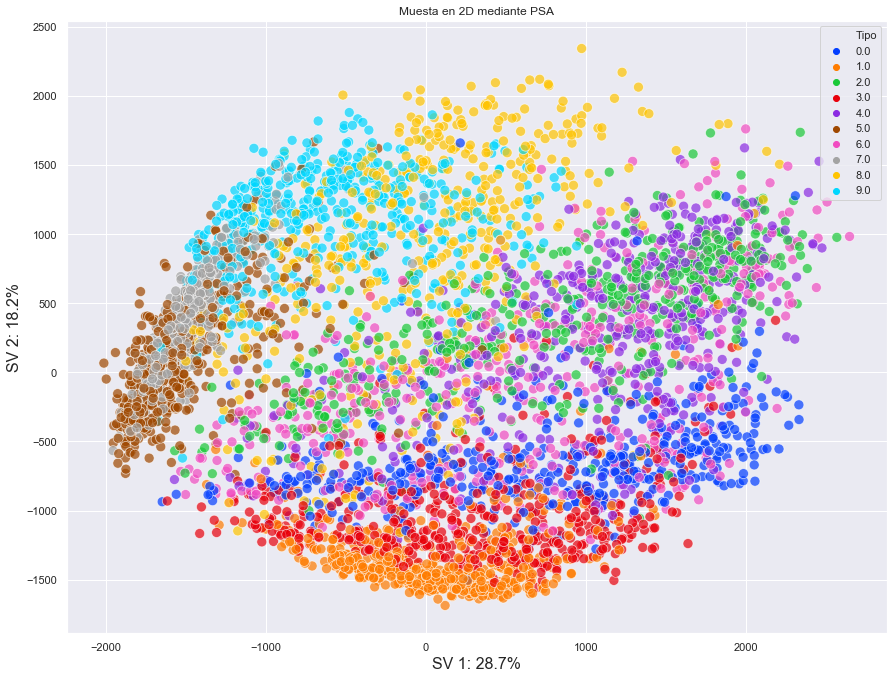

In [23]:
#Graficando el modelo

sns.set(rc={'figure.figsize':(14.7,11.27)})

# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Tipo", 
                palette = "bright", 
                data = train_img_2d, s = 100,
                alpha=0.7)
plt.title("Muesta en 2D mediante PSA")
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=16)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=16)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

## Cluestering mediante k-Means

In [45]:
train_images2D
kmeans = KMeans(n_clusters = 10)
y_pred = kmeans.fit_predict(train_images2D)
y_pred.shape

(5000,)

In [46]:
#Agrega las etiquetas a un dataframe
train_img_2d = np.concatenate((train_images2D, y_pred.reshape(5000,1)), axis=1)
train_img_2d = pd.DataFrame(train_img_2d)

train_img_2d.columns = ['SV1','SV2','Tipo']

train_img_2d

,SV1,SV2,Tipo
0,-162.044579,1614.351256,7.0
1,1416.253160,-401.036561,0.0
2,-694.264570,-1111.490977,2.0
3,59.416780,-968.224494,9.0
4,836.706946,-1181.918801,5.0
...,...,...,...
4995,-1034.961166,792.636045,1.0
4996,1204.674276,321.667499,4.0
4997,-1773.016505,84.604741,3.0
4998,422.389373,1172.413184,7.0


Text(0, 0.5, 'SV 2')

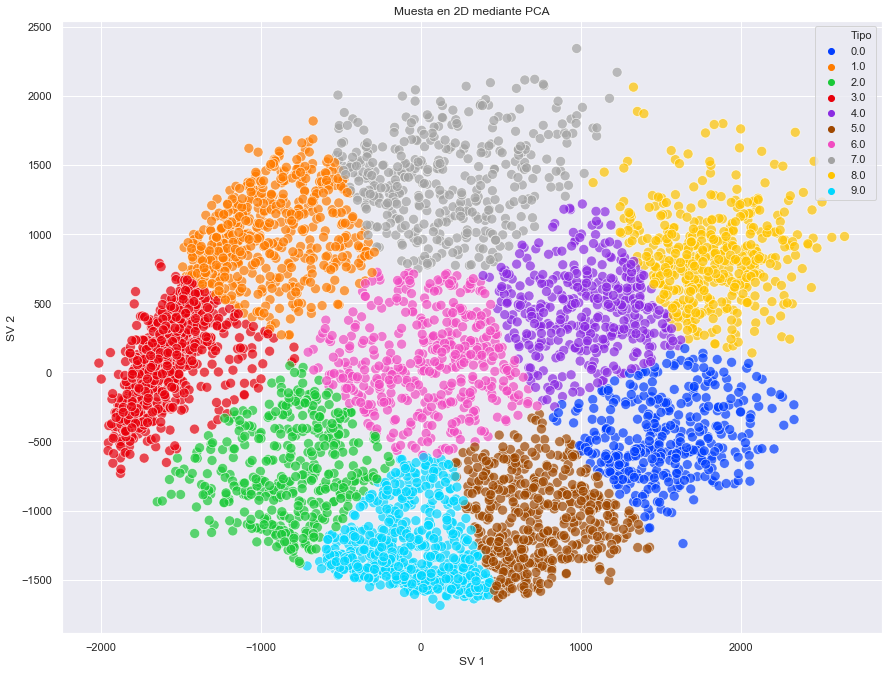

In [47]:
#Grafica del modelo
sns.set(rc={'figure.figsize':(14.7,11.27)})

# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Tipo", 
                palette = "bright", 
                data = train_img_2d, s = 100,
                alpha=0.7)
plt.title("Muesta en 2D mediante PCA")
plt.xlabel("SV 1")
plt.ylabel("SV 2")

 # T-SNE (T-Distributed Stochastic Neighbouring Entities) con sklearn

In [19]:
print(train_images_prueba.shape)

tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(train_images_prueba)

print("Reduccion a 2 componenetes\n", tsne_result, tsne_result.shape)

(5000, 784)
Reduccion a 2 componenetes
 [[ 48.201027  -27.831617 ]
 [ -7.4280753  67.47471  ]
 [ 14.5158205  14.673957 ]
 ...
 [ 12.534048  -40.71541  ]
 [-45.744152  -47.21381  ]
 [ 26.306894   17.307592 ]] (5000, 2)


## Clustering usando labels reales

In [20]:
#Creando el dataframe del modelo
train_img_tsne = np.concatenate((tsne_result, train_labels[0:5000].reshape(5000,1)), axis=1)
train_img_tsne = pd.DataFrame(train_img_tsne)

train_img_tsne.columns = ['SV1','SV2','Tipo']

print(np.unique(train_labels[0:5000]))

train_img_tsne

[0 1 2 3 4 5 6 7 8 9]


,SV1,SV2,Tipo
0,48.201027,-27.831617,9.0
1,-7.428075,67.474709,0.0
2,14.515821,14.673957,0.0
3,8.523207,19.585138,3.0
4,16.111179,36.478958,0.0
...,...,...,...
4995,23.885433,-60.835365,7.0
4996,-37.798847,23.062330,6.0
4997,12.534048,-40.715408,5.0
4998,-45.744152,-47.213810,8.0


Text(0, 0.5, 'SV 2')

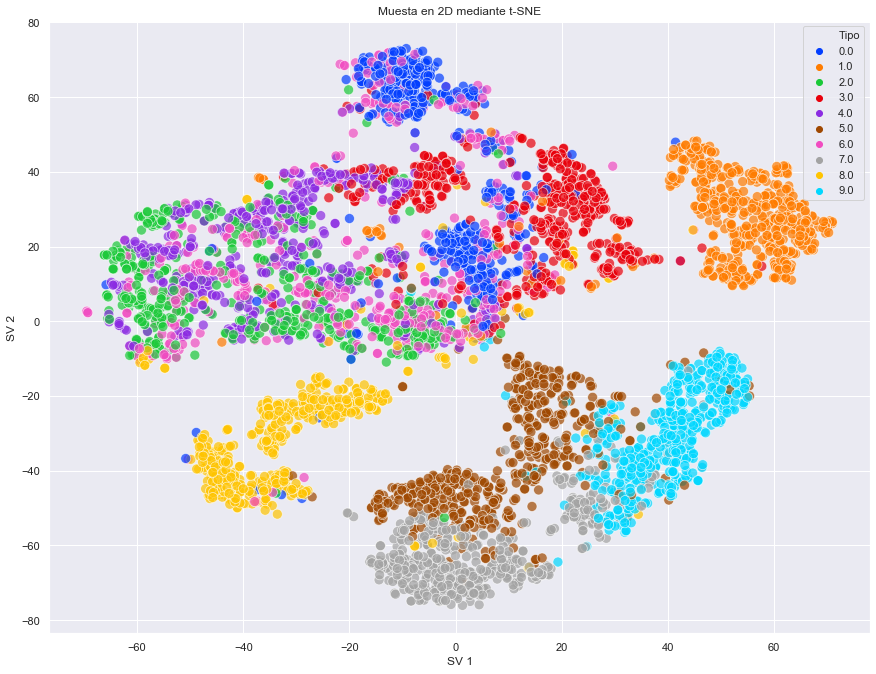

In [22]:
#Grafica del modelo
sns.set(rc={'figure.figsize':(14.7,11.27)})

# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Tipo", 
                palette = "bright", 
                data = train_img_tsne, s = 100,
                alpha=0.7)
plt.title("Muesta en 2D mediante t-SNE")
plt.xlabel("SV 1")
plt.ylabel("SV 2")

## Clustering mediante K-Means

In [31]:
tsne_result
kmeans = KMeans(n_clusters = 10)
y_pred = kmeans.fit_predict(tsne_result)
y_pred.shape

(5000,)

In [32]:
#Creando el dataframe del modelo
train_img_tsne = np.concatenate((tsne_result, y_pred.reshape(5000,1)), axis=1)
train_img_tsne = pd.DataFrame(train_img_tsne)

train_img_tsne.columns = ['SV1','SV2','Tipo']

train_img_tsne

,SV1,SV2,Tipo
0,48.201027,-27.831617,1.0
1,-7.428075,67.474709,8.0
2,14.515821,14.673957,4.0
3,8.523207,19.585138,4.0
4,16.111179,36.478958,4.0
...,...,...,...
4995,23.885433,-60.835365,5.0
4996,-37.798847,23.062330,6.0
4997,12.534048,-40.715408,5.0
4998,-45.744152,-47.213810,7.0


Text(0, 0.5, 'SV 2')

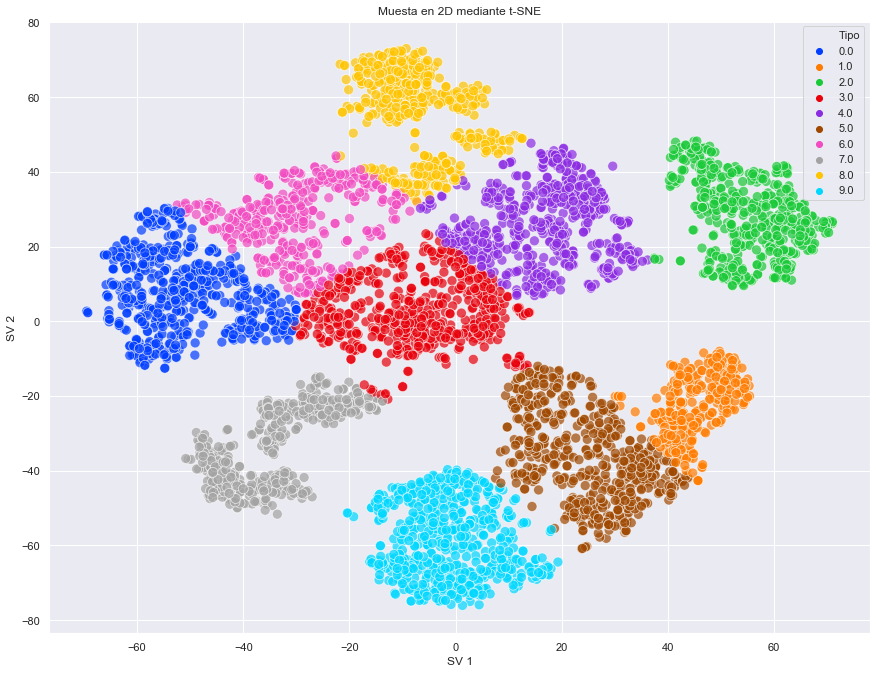

In [33]:
#Grafica del modelo
sns.set(rc={'figure.figsize':(14.7,11.27)})

# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Tipo", 
                palette = "bright", 
                data = train_img_tsne, s = 100,
                alpha=0.7)
plt.title("Muesta en 2D mediante t-SNE")
plt.xlabel("SV 1")
plt.ylabel("SV 2")

## Análisis y conclusiones

Vemos que con ambos modelos se conserva de manera significativa la varianza del modelo original. El uso de PCA es mucho más rápido que mediante t-SNE que computacionalmente lleva mucho tiempo incluso para muestras relativamente pequeñas. Vamos que por la naturaleza del modelo generado, al aplicar clustering mediante k-means, el modelos de t-SNE clasifica mejor, y el PCA es muy malo para la creación de clusters.

Es interesante notar que al hacer clusters, ambos modelos clasifican relativamente bien los tipos de prendas. En el caso de PCA, se puede ver que los datos están más relacionados unos con otros, pero a pesar de tener únicamente el 46.9% la clasificación, separa prendas muy diferentes, como los pantalones de los zapatos, aunque también existen muchas prendas que no clasifica del todo bien entre ellas, como podría ser los suéteres de las camisas. 

Mediante t-SNE, la clasificación separa de mejor forma los datos, y con clusters más definidos que PCA, los pantalones y bolsas están muy bien clasificadas, sin embargo, también hay algunos errores como los suéteres y las camisas que al ser muy parecidos en los datos originales y reducir su dimensionalidad, causan errores esperados en la clasificación. 
